## 🔧 Google Colab Setup
Mount Google Drive and set the working directory so relative paths work like in the GitHub repo.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/python-data-analysis-bootcamp/notebooks')
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/python-data-analysis-bootcamp/notebooks'

# GDP per Capita Analysis with Pandas

This notebook analyses GDP per capita across different countries and UN regions. The dataset contains several GDP estimates; in this analysis we use the **IMF estimate** as GDP per capita.

## 1. Load the dataset

We load `gdp_per_capita.csv` from the `data` folder.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load GDP per capita dataset
df = pd.read_csv('../data/gdp_per_capita.csv')
df.head(10)

,Unnamed: 0,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
0,1,Monaco,Europe,0,0,234316,2021,234317,2021
1,2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
2,3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
3,4,Ireland,Europe,114581,2023,100172,2021,101109,2021
4,5,Bermuda,Americas,0,0,114090,2021,112653,2021
5,6,Norway,Europe,101103,2023,89154,2021,89242,2021
6,7,Switzerland,Europe,98767,2023,91992,2021,93525,2021
7,8,Singapore,Asia,91100,2023,72794,2021,66822,2021
8,9,Isle of Man,Europe,0,0,87158,2019,0,0
9,10,Cayman Islands,Americas,0,0,86569,2021,85250,2021


## 2. Basic inspection

Check the structure and basic statistics of the dataset.

In [3]:
# Show column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          223 non-null    int64 
 1   Country/Territory   223 non-null    object
 2   UN_Region           223 non-null    object
 3   IMF_Estimate        223 non-null    int64 
 4   IMF_Year            223 non-null    int64 
 5   WorldBank_Estimate  223 non-null    int64 
 6   WorldBank_Year      223 non-null    int64 
 7   UN_Estimate         223 non-null    int64 
 8   UN_Year             223 non-null    object
dtypes: int64(6), object(3)
memory usage: 15.8+ KB


In [4]:
# Summary statistics for numeric and non-numeric columns
df.describe(include='all')

,Unnamed: 0,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
count,223.000000,223,223,223.000000,223.000000,223.000000,223.000000,223.000000,223
unique,NaN,223,6,NaN,NaN,NaN,NaN,NaN,3
top,NaN,Monaco,Africa,NaN,NaN,NaN,NaN,NaN,2021
freq,NaN,1,55,NaN,NaN,NaN,NaN,NaN,213
mean,112.000000,NaN,NaN,15351.632287,1787.098655,18927.417040,1957.278027,17767.304933,NaN
std,64.518731,NaN,NaN,22550.899445,650.695912,29103.564915,353.145867,28698.104167,NaN
min,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,56.500000,NaN,NaN,1406.500000,2023.000000,2273.500000,2021.000000,2039.000000,NaN
50%,112.000000,NaN,NaN,5421.000000,2023.000000,6805.000000,2021.000000,6396.000000,NaN
75%,167.500000,NaN,NaN,19697.000000,2023.000000,23715.000000,2021.000000,20740.000000,NaN


## 3. Select relevant columns

The dataset includes multiple GDP estimates. Here we:
- Use `IMF_Estimate` as our GDP per capita value
- Rename it to `GDP_per_capita`
- Keep only `Country/Territory`, `UN_Region`, and `GDP_per_capita`.

In [5]:
# Rename IMF_Estimate -> GDP_per_capita
df.rename(columns={'IMF_Estimate': 'GDP_per_capita'}, inplace=True)

# Drop any index-like helper column if present
df.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Keep only the columns we need
cols = ['Country/Territory', 'UN_Region', 'GDP_per_capita']
df = df[cols]
df.head()

,Country/Territory,UN_Region,GDP_per_capita
0,Monaco,Europe,0
1,Liechtenstein,Europe,0
2,Luxembourg,Europe,132372
3,Ireland,Europe,114581
4,Bermuda,Americas,0


## 4. Handle missing values

We remove rows with missing values in key columns to keep the analysis clean.

In [6]:
# Check missing values in each column
df.isna().sum()

,0
Country/Territory,0
UN_Region,0
GDP_per_capita,0


In [7]:
# Drop rows with missing values in key columns
df_clean = df.dropna(subset=['Country/Territory', 'UN_Region', 'GDP_per_capita'])
df_clean.head()

,Country/Territory,UN_Region,GDP_per_capita
0,Monaco,Europe,0
1,Liechtenstein,Europe,0
2,Luxembourg,Europe,132372
3,Ireland,Europe,114581
4,Bermuda,Americas,0


## 5. GDP per capita by UN region

Calculate the average GDP per capita for each UN region.

In [8]:
region_gdp = (
    df_clean
    .groupby('UN_Region')['GDP_per_capita']
    .mean()
    .sort_values(ascending=False)
)
region_gdp

,GDP_per_capita
UN_Region,
Europe,34446.750000
Asia,16665.254902
World,13440.000000
Americas,11871.041667
Oceania,9133.150000
Africa,2802.345455


### 5.1 Visualise regional averages

A bar chart helps compare average GDP per capita across regions.

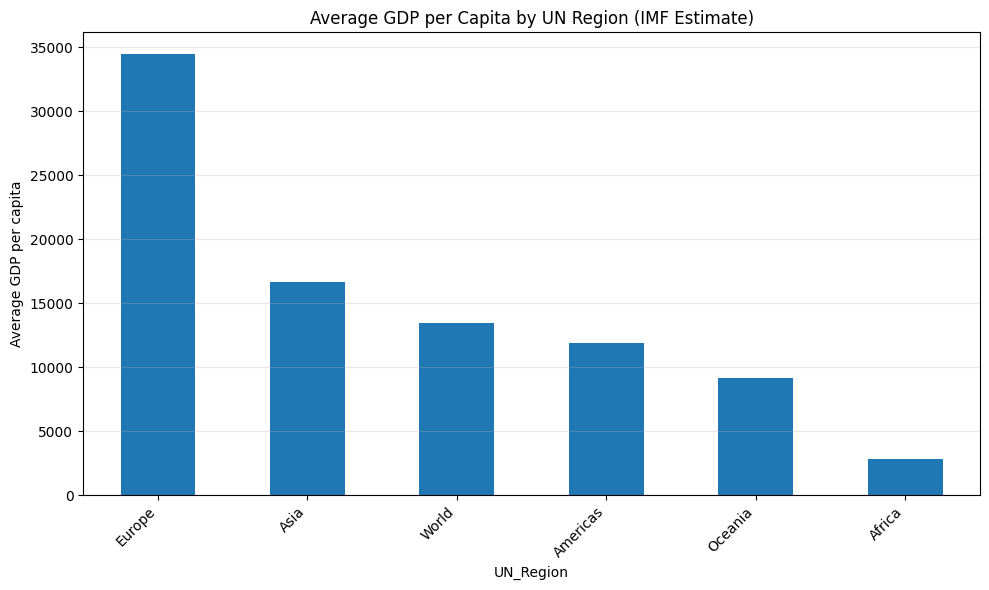

In [9]:
plt.figure(figsize=(10, 6))
region_gdp.plot(kind='bar')
plt.ylabel('Average GDP per capita')
plt.title('Average GDP per Capita by UN Region (IMF Estimate)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 🌍 Insight: Regional Wealth Differences
Western Europe and North America dominate GDP per capita, showing strong developed economies compared to developing regions.

## 6. Top and bottom countries by GDP per capita

We look at the 10 richest and 10 poorest countries based on GDP per capita (IMF estimate).

In [10]:
# Top 10 countries
top_10 = df_clean.sort_values(by='GDP_per_capita', ascending=False).head(10)
top_10

,Country/Territory,UN_Region,GDP_per_capita
2,Luxembourg,Europe,132372
3,Ireland,Europe,114581
5,Norway,Europe,101103
6,Switzerland,Europe,98767
7,Singapore,Asia,91100
10,Qatar,Asia,83891
11,United States,Americas,80034
12,Iceland,Europe,75180
15,Denmark,Europe,68827
16,Australia,Oceania,64964


### 💰 Insight: Top Countries
Top GDP per capita countries are small, high‑income financial or resource‑rich nations.

In [11]:
# Bottom 10 countries
bottom_10 = df_clean.sort_values(by='GDP_per_capita', ascending=True).head(10)
bottom_10

,Country/Territory,UN_Region,GDP_per_capita
0,Monaco,Europe,0
1,Liechtenstein,Europe,0
4,Bermuda,Americas,0
8,Isle of Man,Europe,0
13,Channel Islands,Europe,0
14,Faroe Islands,Europe,0
9,Cayman Islands,Americas,0
18,Greenland,Americas,0
30,British Virgin Islands,Americas,0
41,Guam,Oceania,0


### 🟤 Insight: Lower GDP Countries
Bottom‑ranked nations are mostly developing countries with limited industrialisation.

### 6.1 Visualise top 10 countries

A horizontal bar chart shows the differences between the richest countries.

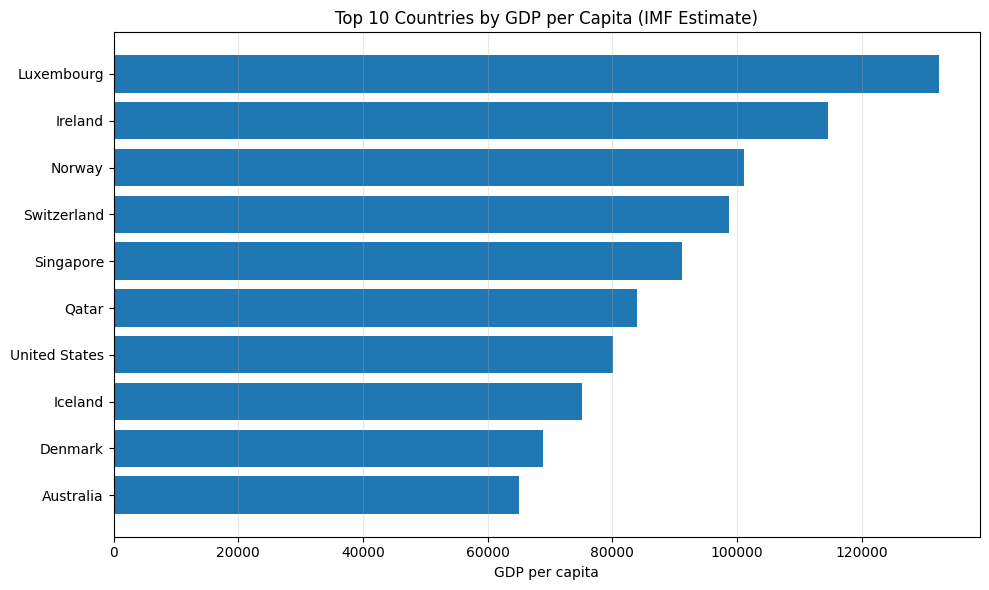

In [12]:
plt.figure(figsize=(10, 6))
plt.barh(top_10['Country/Territory'], top_10['GDP_per_capita'])
plt.xlabel('GDP per capita')
plt.title('Top 10 Countries by GDP per Capita (IMF Estimate)')
plt.gca().invert_yaxis()  # highest at the top
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 💰 Insight: Top Countries
Top GDP per capita countries are small, high‑income financial or resource‑rich nations.

## 7. Distribution of GDP per capita

This histogram shows how GDP per capita values are spread across all countries.

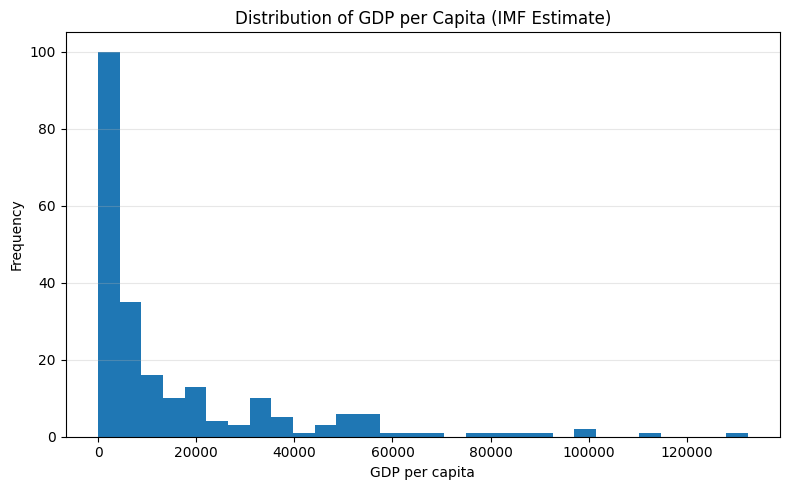

In [13]:
plt.figure(figsize=(8, 5))
df_clean['GDP_per_capita'].plot(kind='hist', bins=30)
plt.xlabel('GDP per capita')
plt.ylabel('Frequency')
plt.title('Distribution of GDP per Capita (IMF Estimate)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### 📈 Insight: GDP Distribution
The distribution is right‑skewed, showing a few very wealthy countries and many lower‑income ones.

## 8. Conclusions

From this analysis we can see:

- Which UN regions have the highest and lowest average GDP per capita  
- The countries at the top and bottom of the GDP per capita rankings  
- How GDP per capita values are distributed globally  

This is a simple example of cleaning, aggregating, and visualising economic data using Pandas and Matplotlib.